In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

boston = load_boston()
X_data = boston.data
Y_data = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=4)

SVRv1 = SVR(kernel='rbf')
SVRv1.fit(X_train, Y_train)
print(SVRv1.score(X_test, Y_test))

0.09023256595559315


In [12]:
knnR = KNeighborsRegressor()
knnR.fit(X_train, Y_train)
print(knnR.score(X_test, Y_test))

0.4712807008322455


In [19]:
knnRv2 = KNeighborsRegressor()
scores = -cross_val_score(knnRv2, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
print(scores.mean())

40.89387308677099


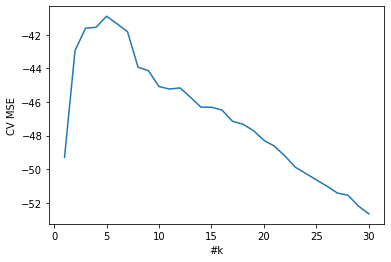

In [21]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knnRv3 = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knnRv3, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('#k')
plt.ylabel('CV MSE')
plt.show()